# Phishing Capstone Project

In [206]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from IPython.core.display import HTML
import numpy as np

In [207]:
# Files courtesy of Brandon Rhodes: https://github.com/brandon-rhodes/pycon-pandas-tutorial
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Data Wrangling

In [208]:
# data
data = pd.read_csv('datasets/phishing_data.csv')

In [209]:
# deleting existing index column, and reindexing starting at 0 for consistency
data['index'] = data.index
data.index.name = 'index'
data.drop("index", axis=1, inplace=True)
data.shape

(11055, 31)

In [210]:
pd.set_option('display.max_columns', None) 
data.head(3)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,port,HTTPS_token,Request_URL,URL_of_Anchor,Links_in_tags,SFH,Submitting_to_email,Abnormal_URL,Redirect,on_mouseover,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### Renaming Columns

In [211]:
new_cols = ['url_contains_ip_address', 'url_length', 'shortening_service',
       'url_contains_at_symbol', 'url_contains_double_slash', 'url_contains_dash',
       'url_contains_sub_domain', 'ssl_final_state', 'domain_registeration_period',
       'favicon', 'non_standard_ports', 'url_contains_https_token', 'request_url', 'url_of_anchor',
       'links_in_tags', 'sfh', 'submitting_to_email', 'abnormal_url',
       'redirect', 'on_mouseover', 'right_click_disabled', 'popup_widnow', 'uses_iframe',
       'age_of_domain', 'dns_record_available', 'web_traffic', 'page_rank',
       'google_index_exists', 'links_pointing_to_page', 'statistical_report',
       'result']
data.columns = new_cols

In [212]:
data.head(3)

,url_contains_ip_address,url_length,shortening_service,url_contains_at_symbol,url_contains_double_slash,url_contains_dash,url_contains_sub_domain,ssl_final_state,domain_registeration_period,favicon,non_standard_ports,url_contains_https_token,request_url,url_of_anchor,links_in_tags,sfh,submitting_to_email,abnormal_url,redirect,on_mouseover,right_click_disabled,popup_widnow,uses_iframe,age_of_domain,dns_record_available,web_traffic,page_rank,google_index_exists,links_pointing_to_page,statistical_report,result
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,1,-1,1,0,-1,-1,1,1,0,1,1,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,1,-1,1,0,-1,-1,-1,-1,0,1,1,1,1,1,-1,1,-1,1,0,-1,-1


#### Data dictionary

In [213]:
for col in data.columns:
    if col != 'result':
        print(data.groupby([col, 'result']).size().unstack('result'))

result                     -1     1
url_contains_ip_address            
-1                       1926  1867
 1                       2972  4290
result        -1     1
url_length            
-1          4079  4881
 0            83    52
 1           736  1224
result                -1     1
shortening_service            
-1                   514   930
 1                  4384  5227
result                    -1     1
url_contains_at_symbol            
-1                       837   818
 1                      4061  5339
result                       -1     1
url_contains_double_slash            
-1                          562   867
 1                         4336  5290
result                 -1       1
url_contains_dash                
-1                 4898.0  4692.0
 1                    NaN  1465.0
result                     -1     1
url_contains_sub_domain            
-1                       1836  1527
 0                       2252  1370
 1                        810  3260
result   

In [224]:
# nested data dict.
data_dict = defaultdict(lambda: defaultdict(str))
data_dict['url_contains_ip_address'][-1] = 'T'
data_dict['url_contains_ip_address'][1] = 'F'

data_dict['url_length'][-1] = '< 54 chars'
data_dict['url_length'][0] = '54 to 75'
data_dict['url_length'][1] = '> 75 chars'

data_dict['shortening_service'][-1] = 'T'
data_dict['shortening_service'][1] = 'F'

data_dict['url_contains_at_symbol'][-1] = 'T'
data_dict['url_contains_at_symbol'][1] = 'F'

data_dict['url_contains_double_slash'][-1] = 'T'
data_dict['url_contains_double_slash'][1] = 'F'

data_dict['url_contains_dash'][-1] = 'T'
data_dict['url_contains_dash'][1] = 'F'

data_dict['url_contains_sub_domain'][-1] = '1 dot in domain part'
data_dict['url_contains_sub_domain'][0] = '2 dots in domain part'
data_dict['url_contains_sub_domain'][1] = 'more than 2 dots in domain part'

data_dict['ssl_final_state'][-1] = 'uses https; issuer is trusted; age of certificate > 1 year'
data_dict['ssl_final_state'][0] = 'uses https; issuer is not trusted'
data_dict['ssl_final_state'][1] = 'does not use https; issuer is not trusted'

data_dict['domain_registeration_period'][-1] = 'domain expires in <= 1 year'
data_dict['domain_registeration_period'][1] = 'domain expires in >= 1 year'

data_dict['favicon'][-1] = 'favicon loaded from external url'
data_dict['favicon'][1] = 'no favicon or favicon loaded from internal url'

data_dict['non_standard_ports'][-1] = 'abides by the rules in "acceptable_ports" dataframe'
data_dict['non_standard_ports'][1] = 'does not abide by the rules in "acceptable_ports" dataframe'

data_dict['url_contains_https_token'][-1] = 'T'
data_dict['url_contains_https_token'][1] = 'F'

data_dict['request_url'][-1] = '< 22%'
data_dict['request_url'][1] = '> 22%'

data_dict['url_of_anchor'][-1] = '< 31%'
data_dict['url_of_anchor'][0] = '31 to 67'
data_dict['url_of_anchor'][1] = '> 67%'

data_dict['links_in_tags'][-1] = '< 17%'
data_dict['links_in_tags'][0] = '17 to 81'
data_dict['links_in_tags'][1] = '> 81%'

data_dict['sfh'][-1] = 'sfh refers to same domain'
data_dict['sfh'][0] = 'sfh refers to a different domain'
data_dict['sfh'][1] = 'sfh is "about: blank" or empty'

data_dict['submitting_to_email'][-1] = 'using "mail()" or "mailto:"'
data_dict['submitting_to_email'][1] = 'not using "mail()" or "mailto:"'

data_dict['url_contains_host_name'][-1] = 'F'
data_dict['url_contains_host_name'][1] = 'T'

data_dict['redirect'][-1] = '< 4 redirects'
data_dict['redirect'][1] = '>= 4 redirects'

data_dict['on_mouseover'][-1] = 'changes status bar'
data_dict['on_mouseover'][1] = 'does not change status bar'

data_dict['right_click_disabled'][-1] = 'T'
data_dict['right_click_disabled'][1] = 'F'

data_dict['popup_window'][-1] = 'popup window contains text fields (for user info)'
data_dict['popup_window'][1] = 'popup window does not contain text fields'

data_dict['uses_iframe'][-1] = 'T'
data_dict['uses_iframe'][1] = 'F'

data_dict['age_of_domain'][-1] = '< 6 months'
data_dict['age_of_domain'][1] = '> 6 months'

data_dict['dns_record_available'][-1] = 'F'
data_dict['dns_record_available'][1] = 'T'

data_dict['web_traffic'][-1] = 'web rank by traffic < 100,000'
data_dict['web_traffic'][0] = 'web rank by traffic < 100,000'
data_dict['web_traffic'][1] = 'web rank by traffic not available'

data_dict['page_rank'][-1] = 'page rank >= 0.2'
data_dict['page_rank'][1] = 'page rank < 0.2'

data_dict['google_index_exists'][-1] = 'F'
data_dict['google_index_exists'][1] = 'T'

data_dict['links_pointing_to_page'][-1] = '0'
data_dict['links_pointing_to_page'][0] = '0 to 2'
data_dict['links_pointing_to_page'][1] = '>2'

data_dict['statistical_report'][-1] = 'host belongs to top phishing domains, survey by PhishTank'
data_dict['statistical_report'][1] = 'host does not belong to top phishing domains, survey by PhishTank'

In [215]:
acceptable_ports = pd.read_csv('datasets/acceptable_ports.csv')
acceptable_ports

,PORT,Service,Meaning,Preferred Status
0,21,FTP,Transfer files from one host to another,Close
1,22,SSH,Secure File Transfer Protocol,Close
2,23,Telnet,provide a bidirectional interactive text-orien...,Close
3,80,HTTP,Hyper test transfer protocol,Open
4,443,HTTPS,Hypertext transfer protocol secured,Open
5,445,SMB,"Providing shared access to files, printers, se...",Close
6,1433,MSSQL,Store and retrieve data as requested by other ...,Close
7,1521,ORACLE,Access oracle database from web.,Close
8,3306,MySQL,Access MySQL database from web.,Close
9,3389,Remote Desktop,allow remote access and remote collaboration,Close


#### Missing Values & Outliers

In [216]:
[sum(data[i].isnull()) for i in data.columns]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [217]:
[set(data[i]) for i in data.columns]

[{-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1},
 {-1, 0, 1},
 {-1, 1},
 {-1, 1}]

### Exploratory Data Analysis

C:\Users\maksym\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


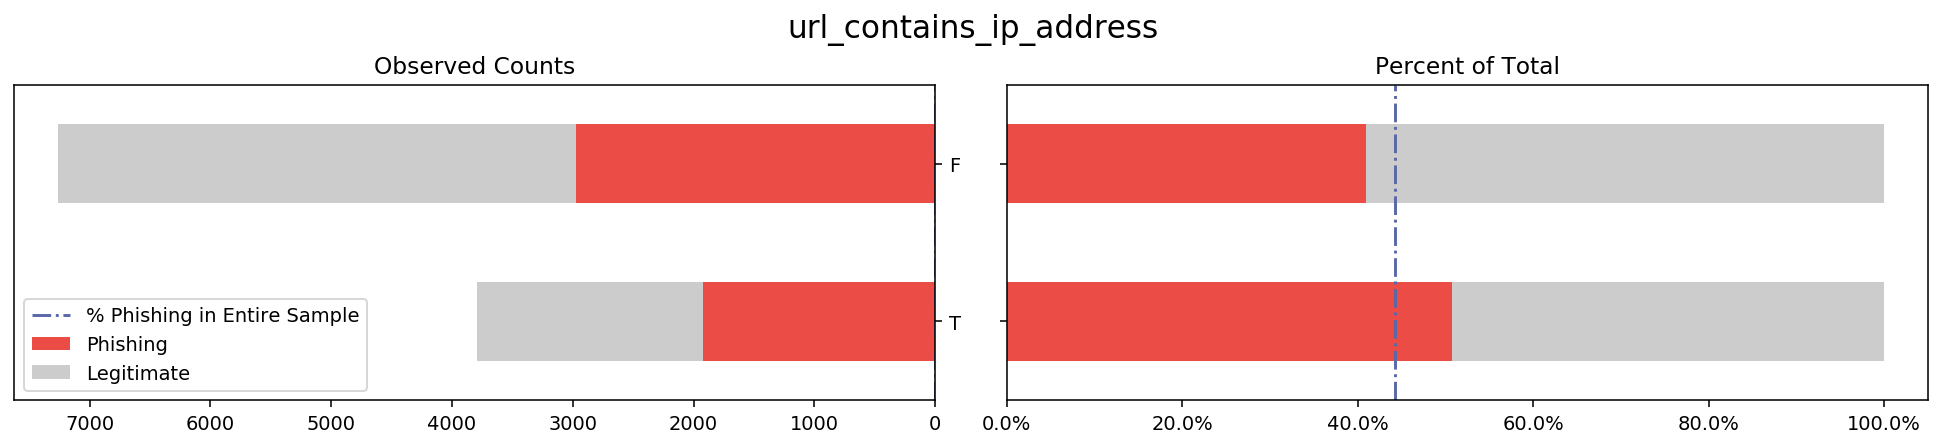

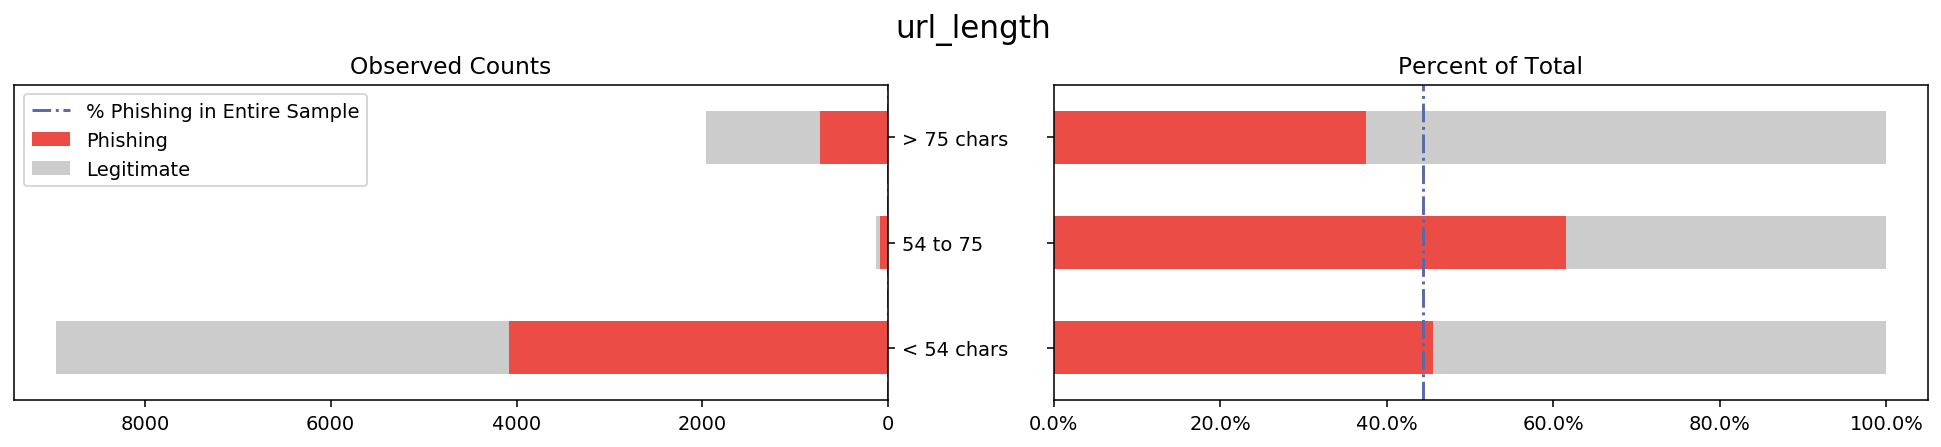

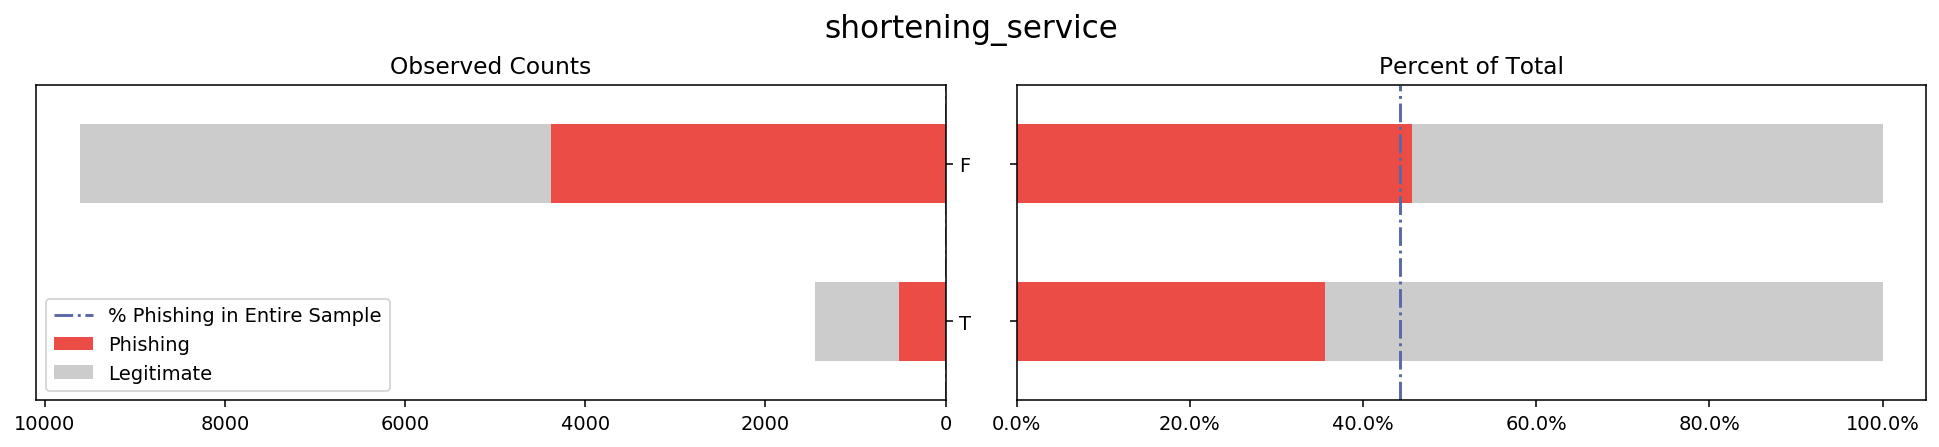

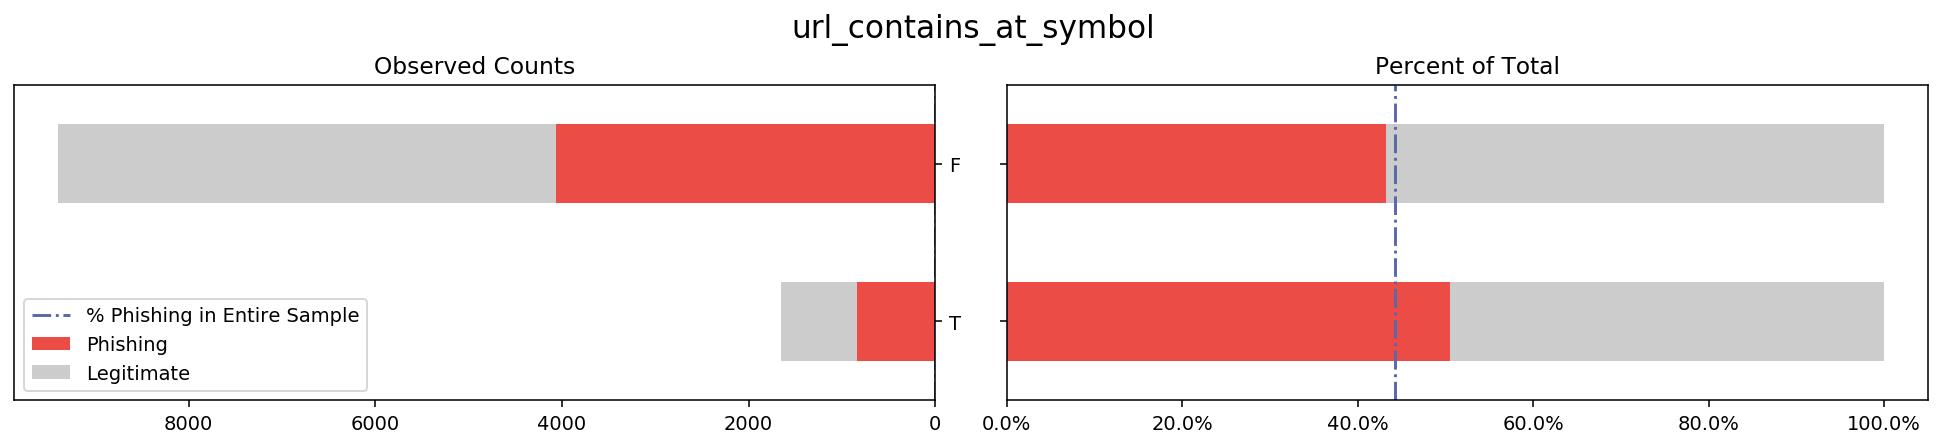

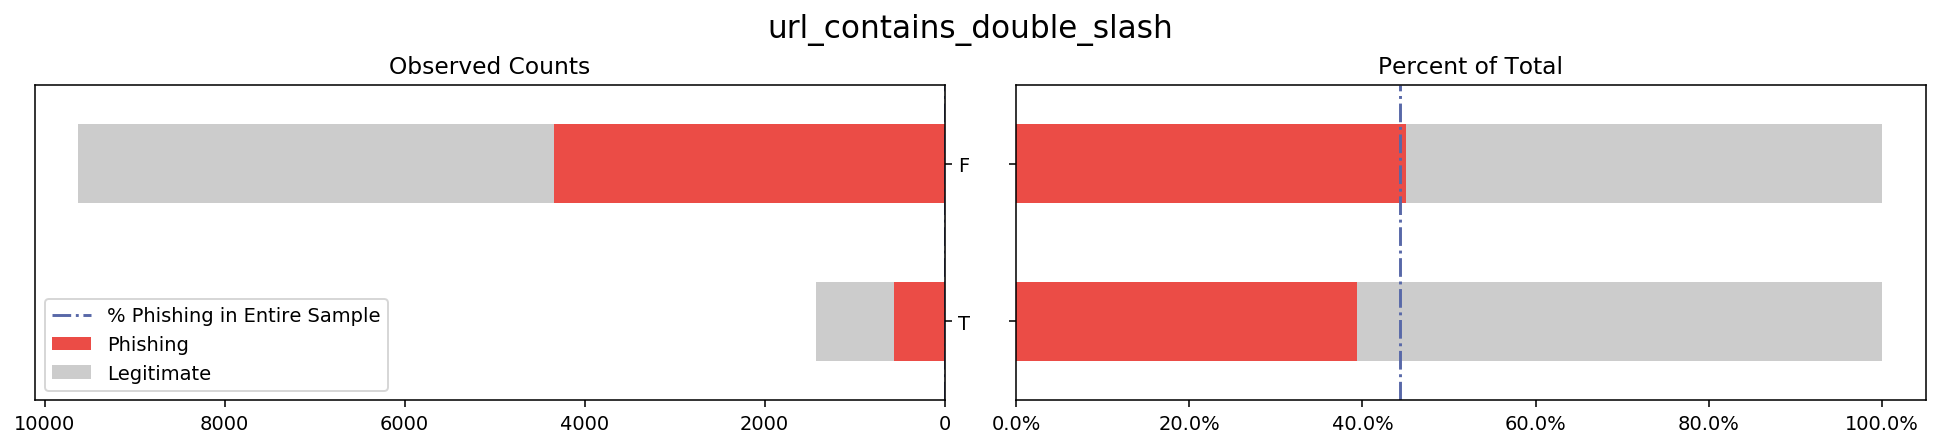

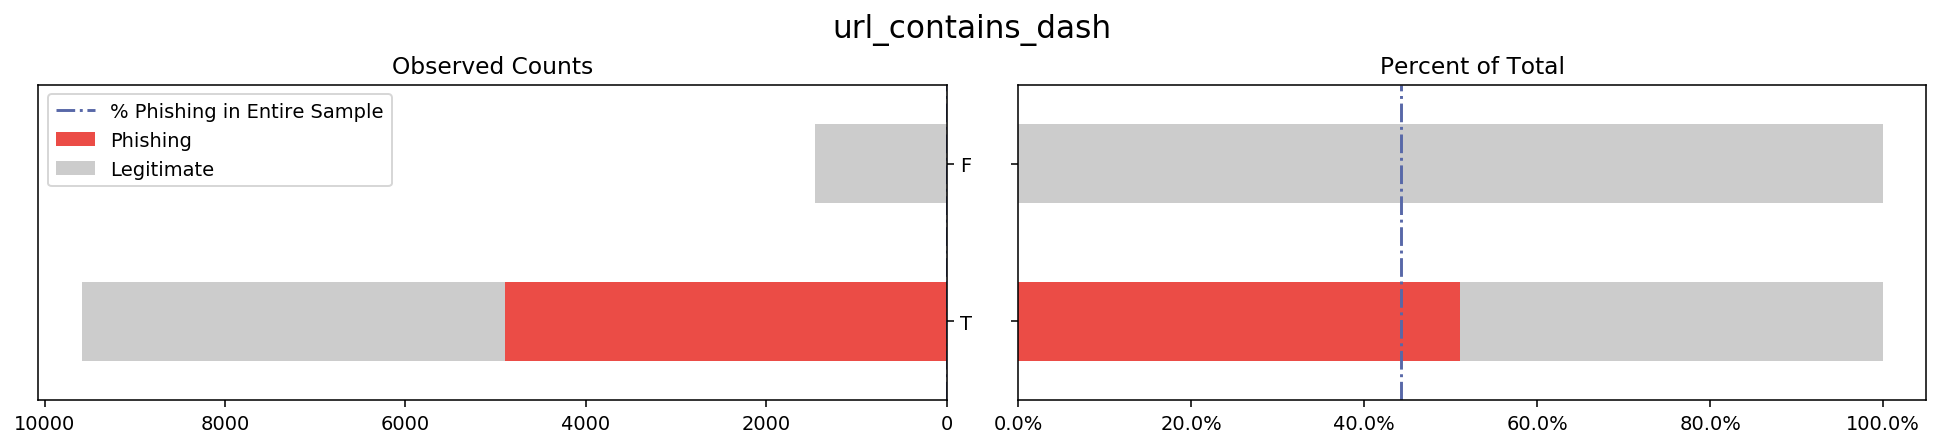

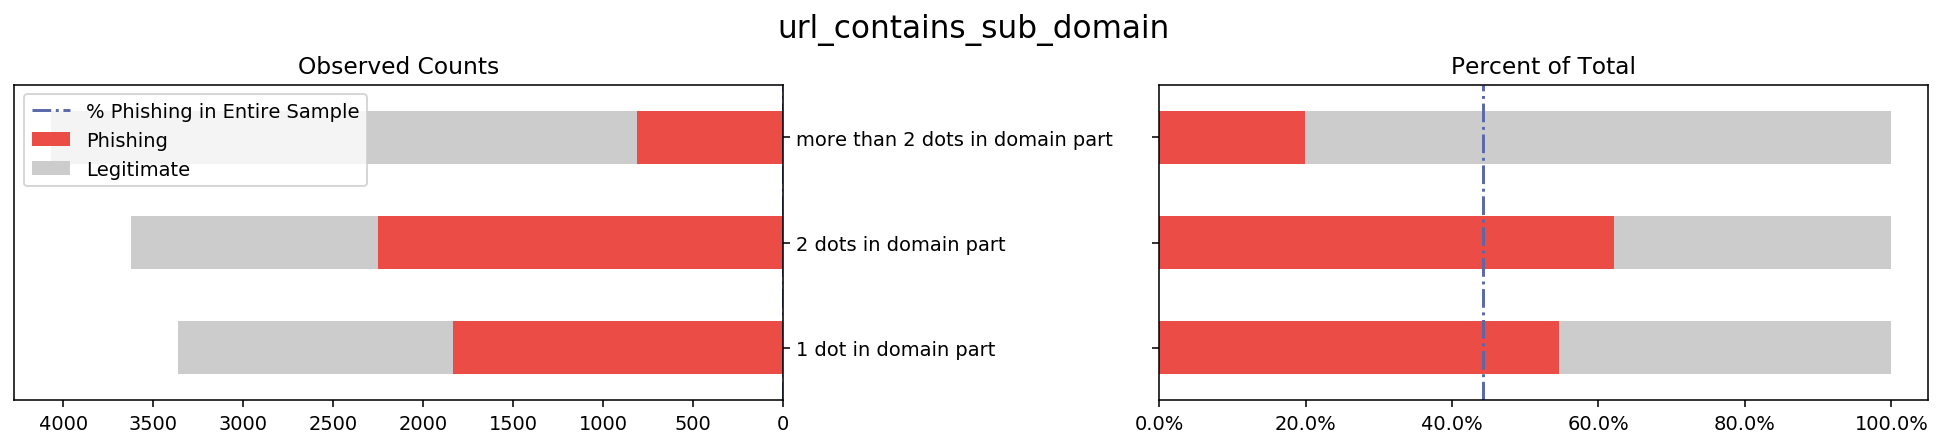

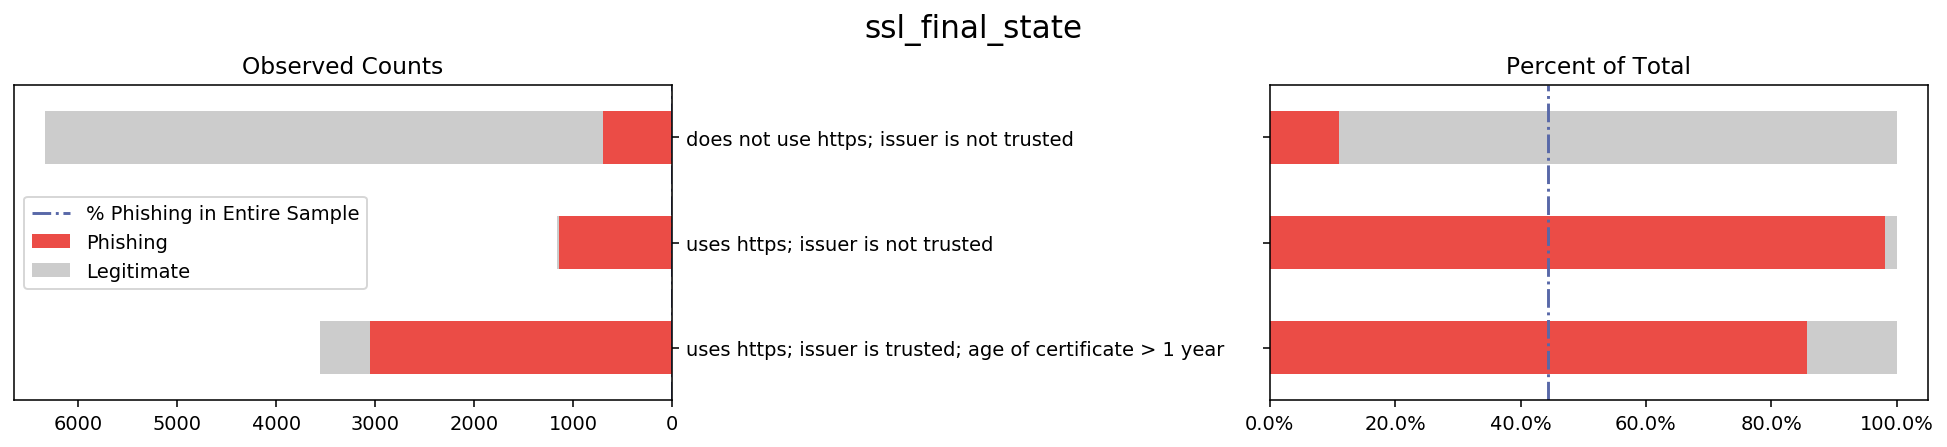

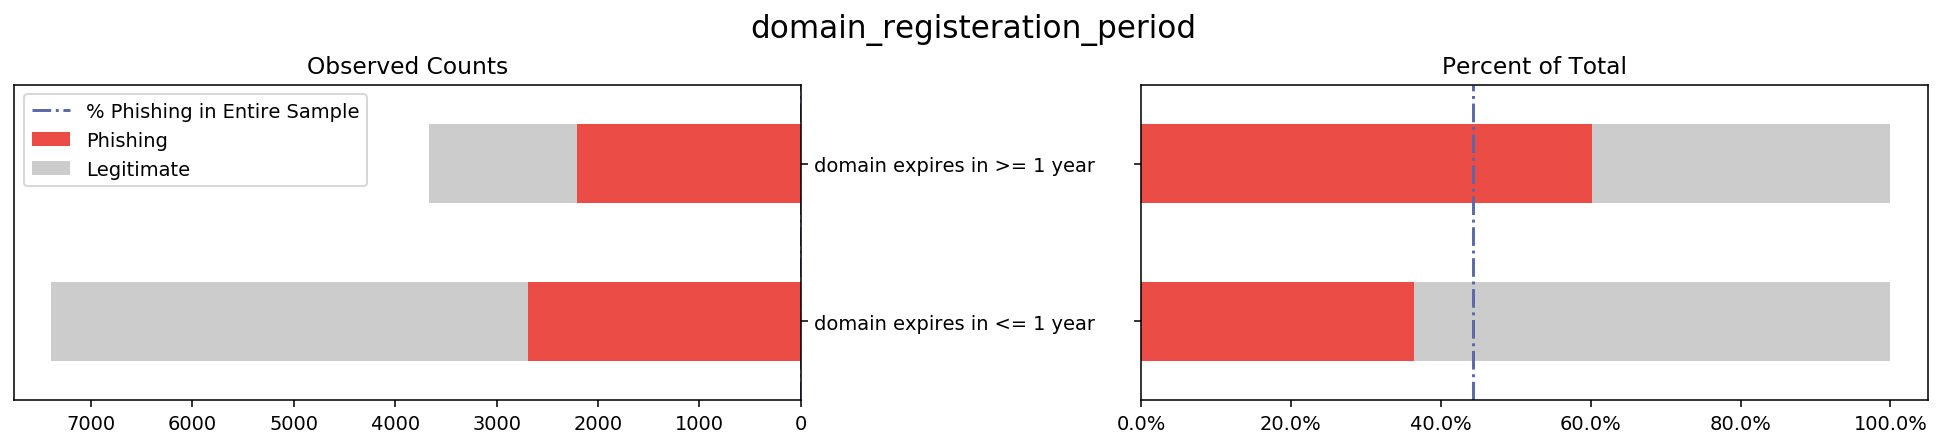

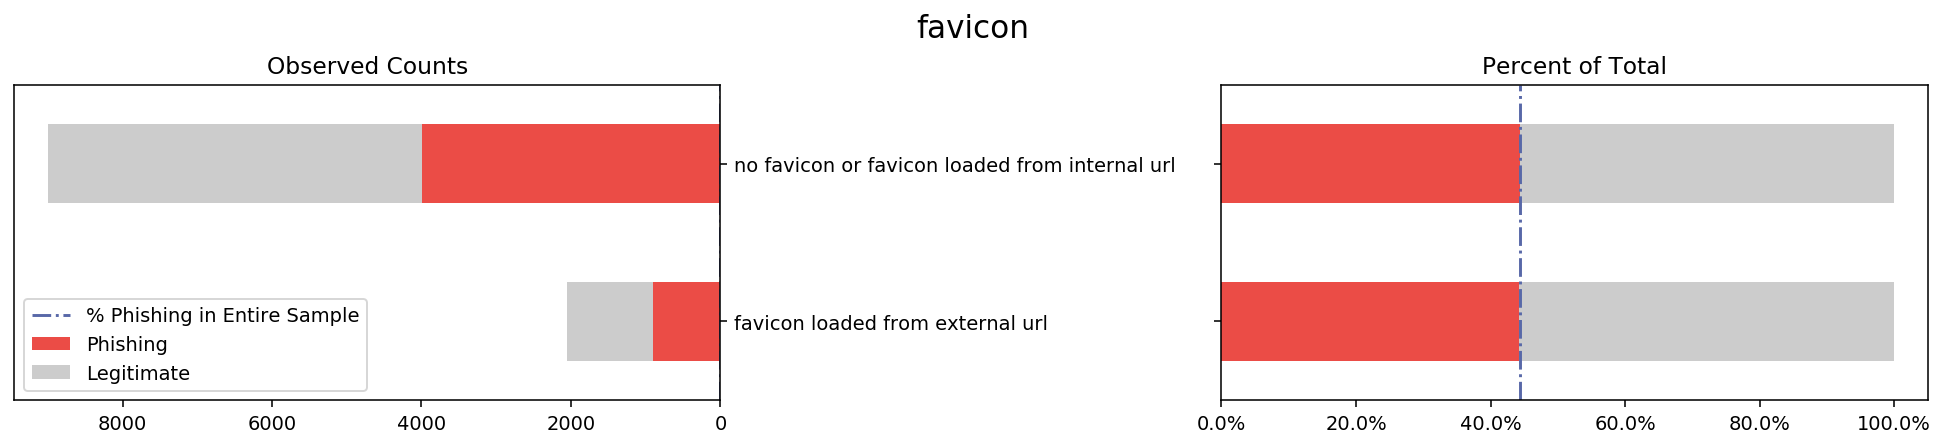

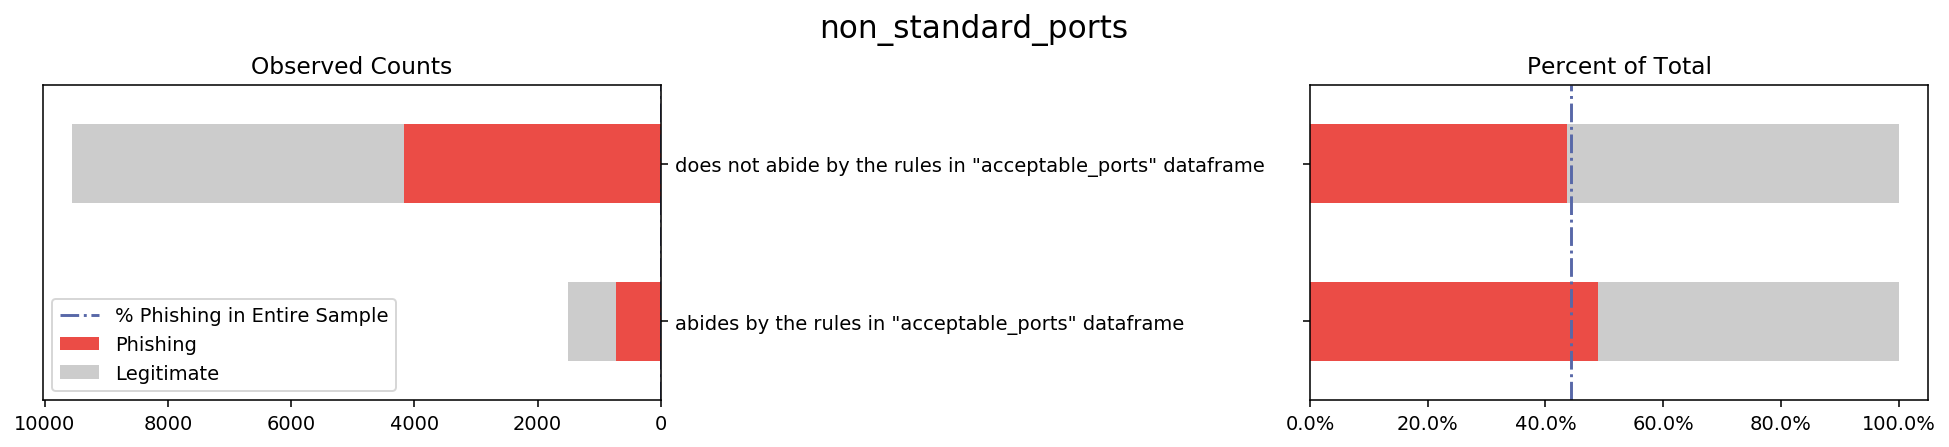

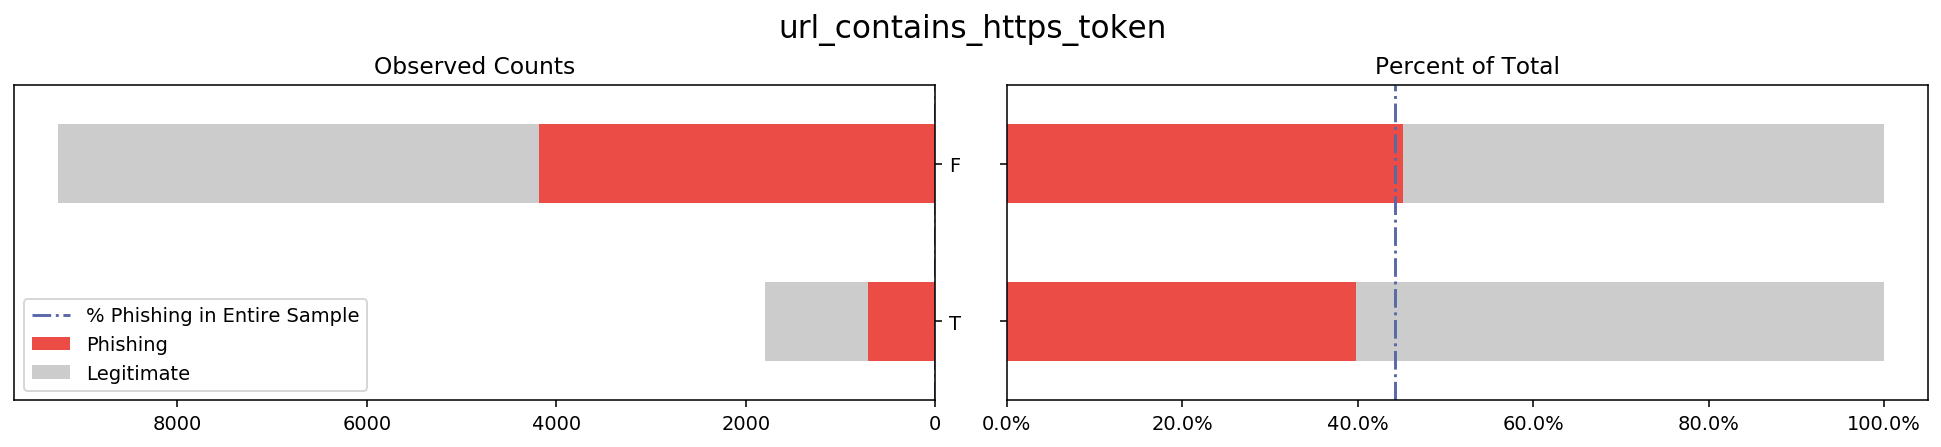

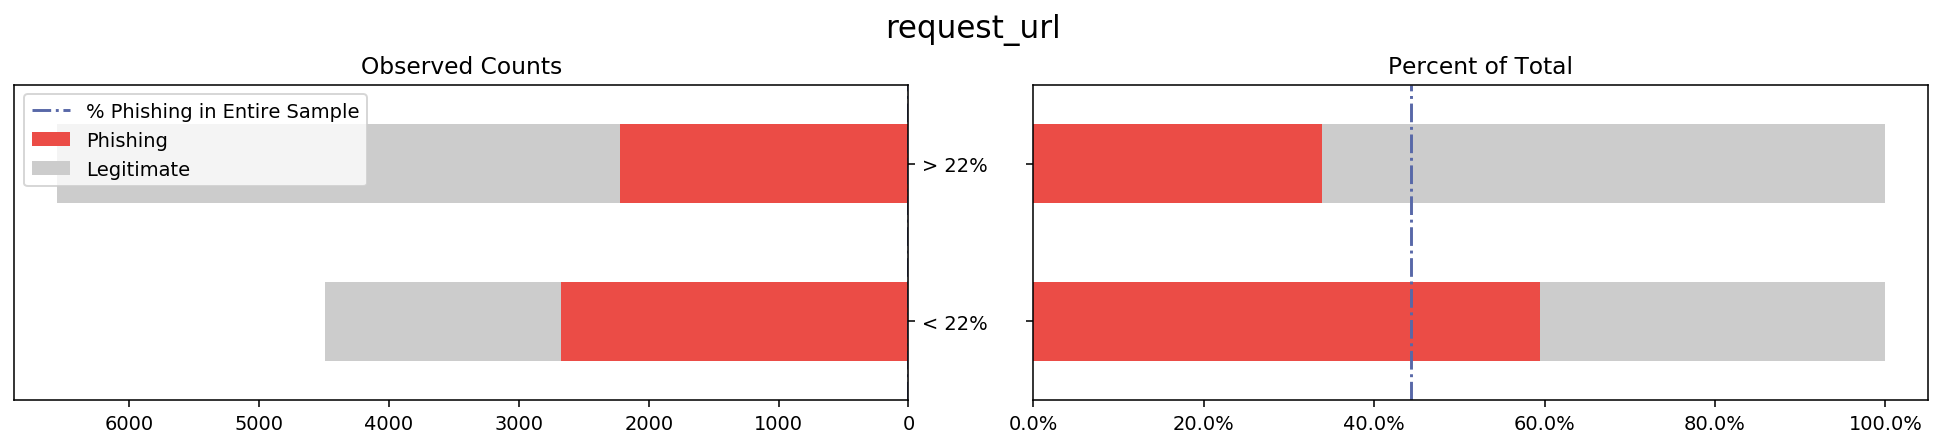

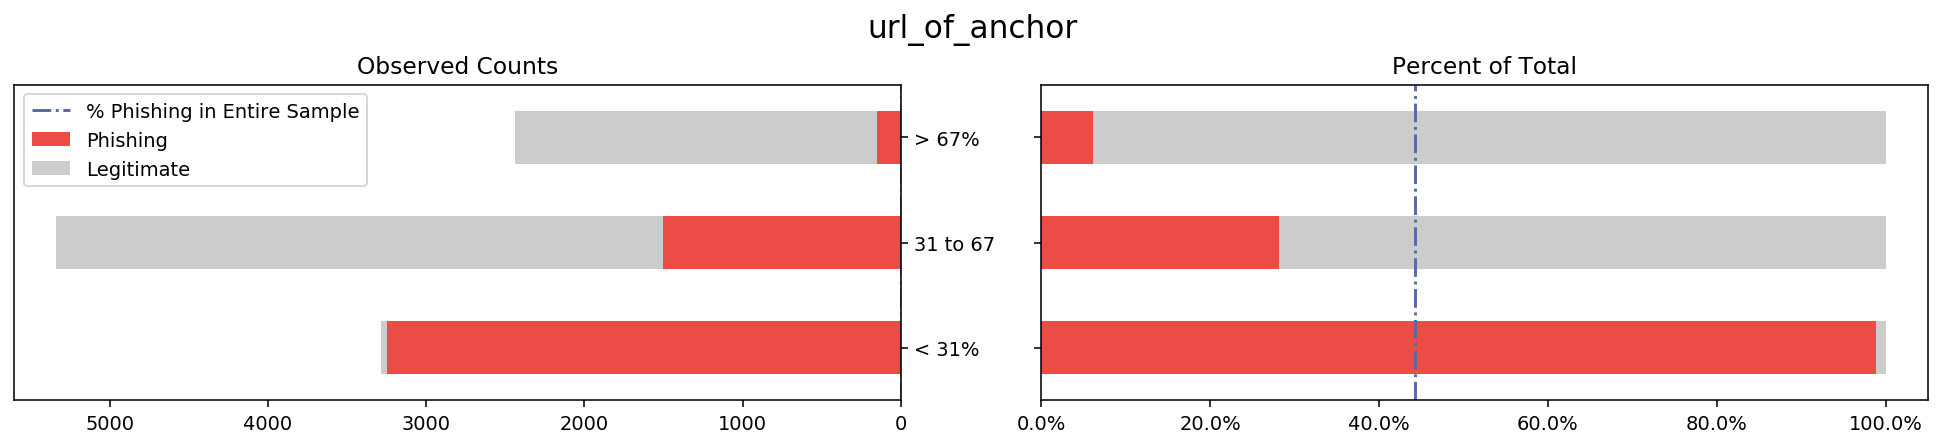

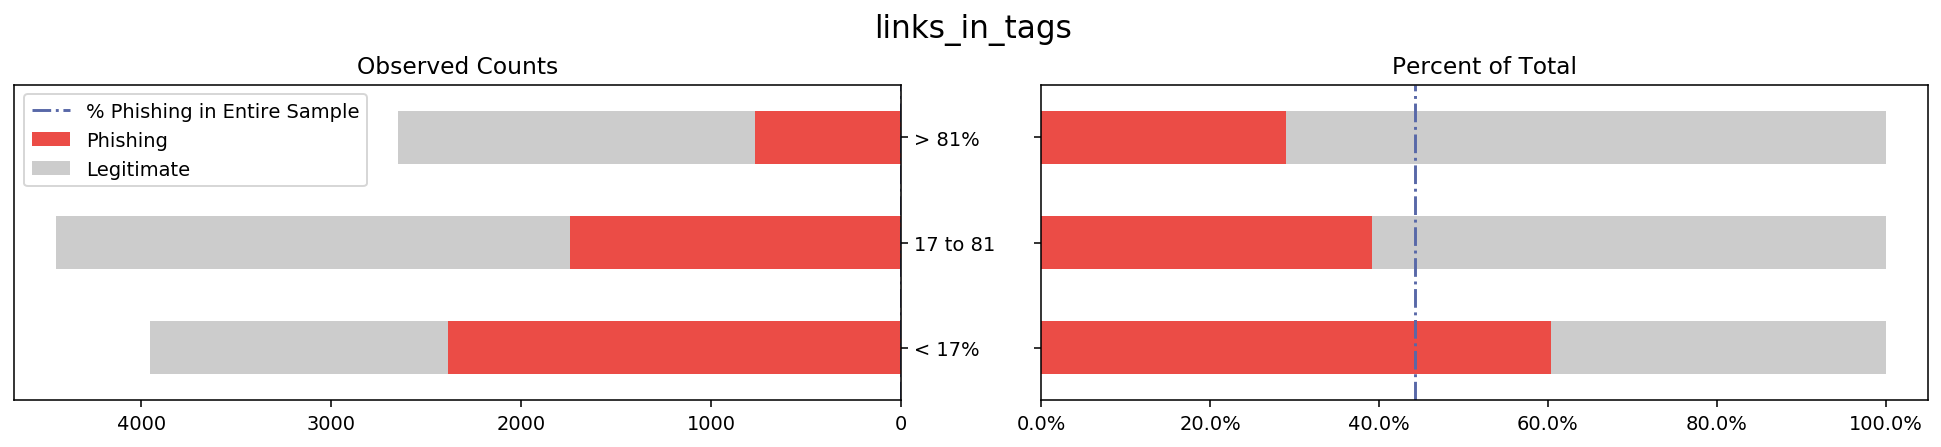

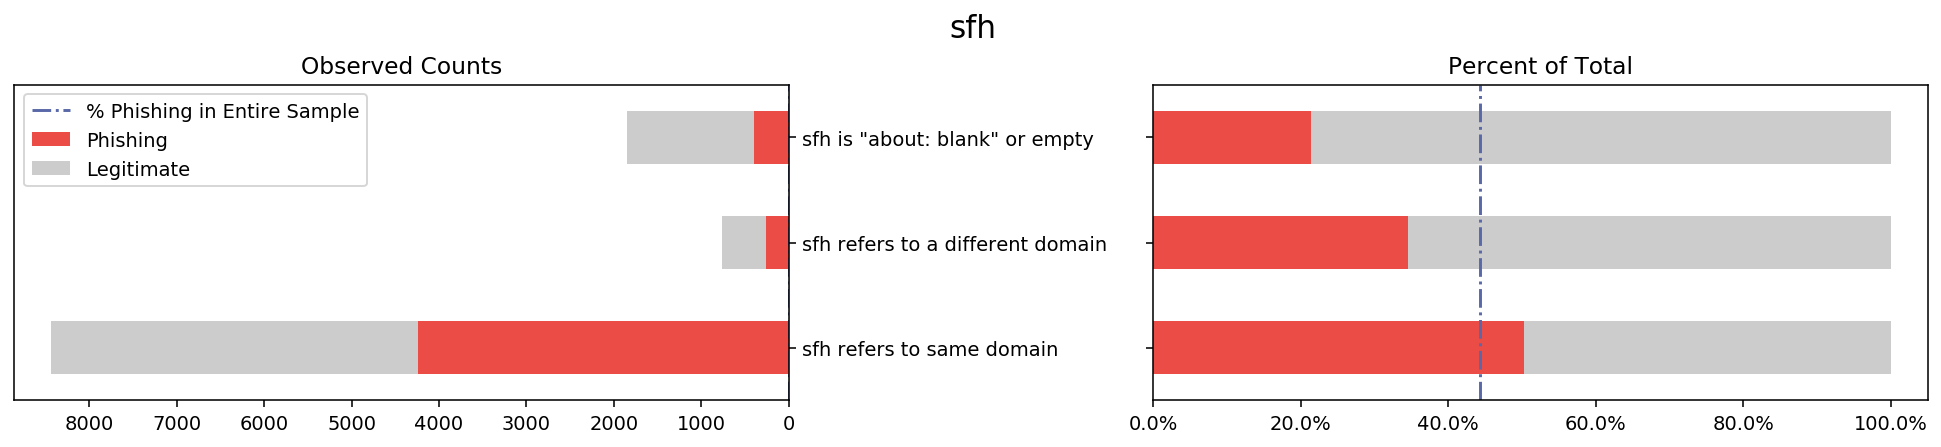

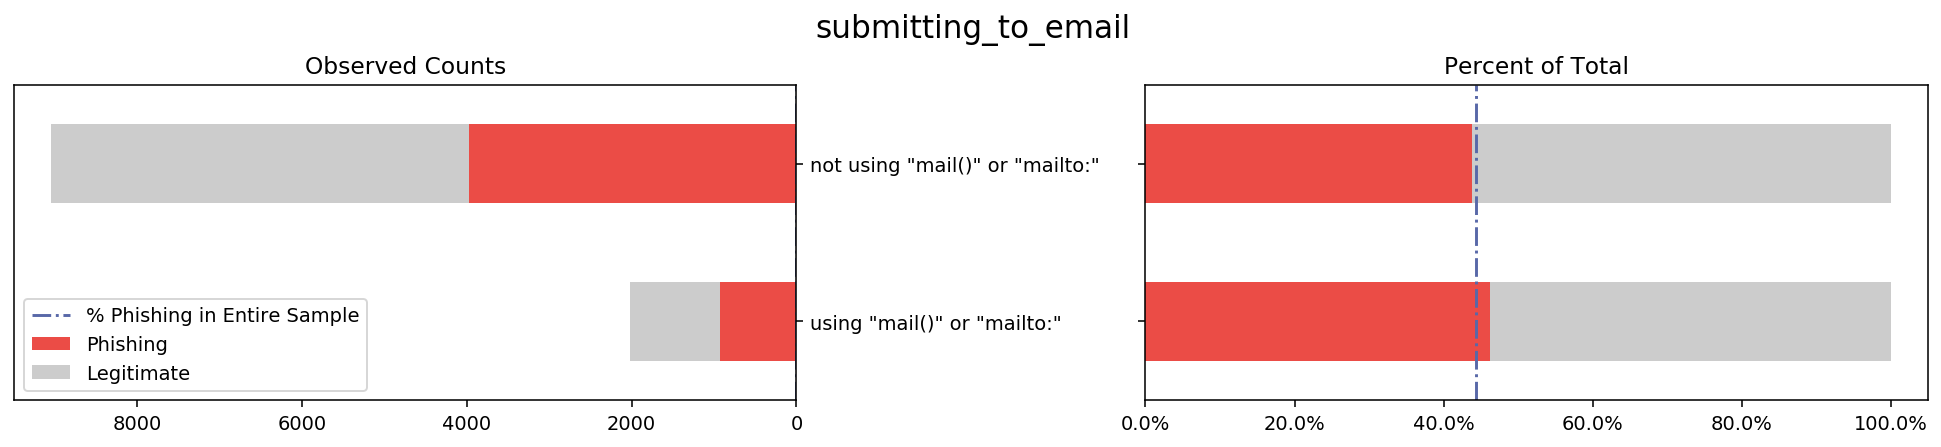

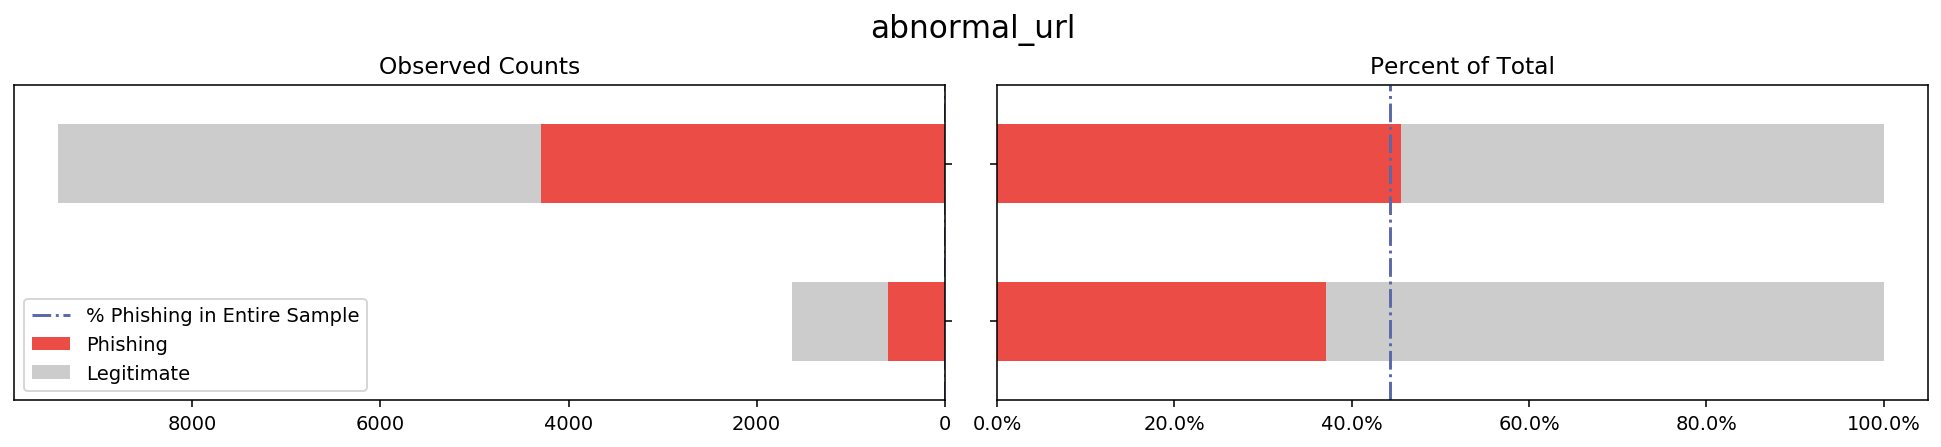

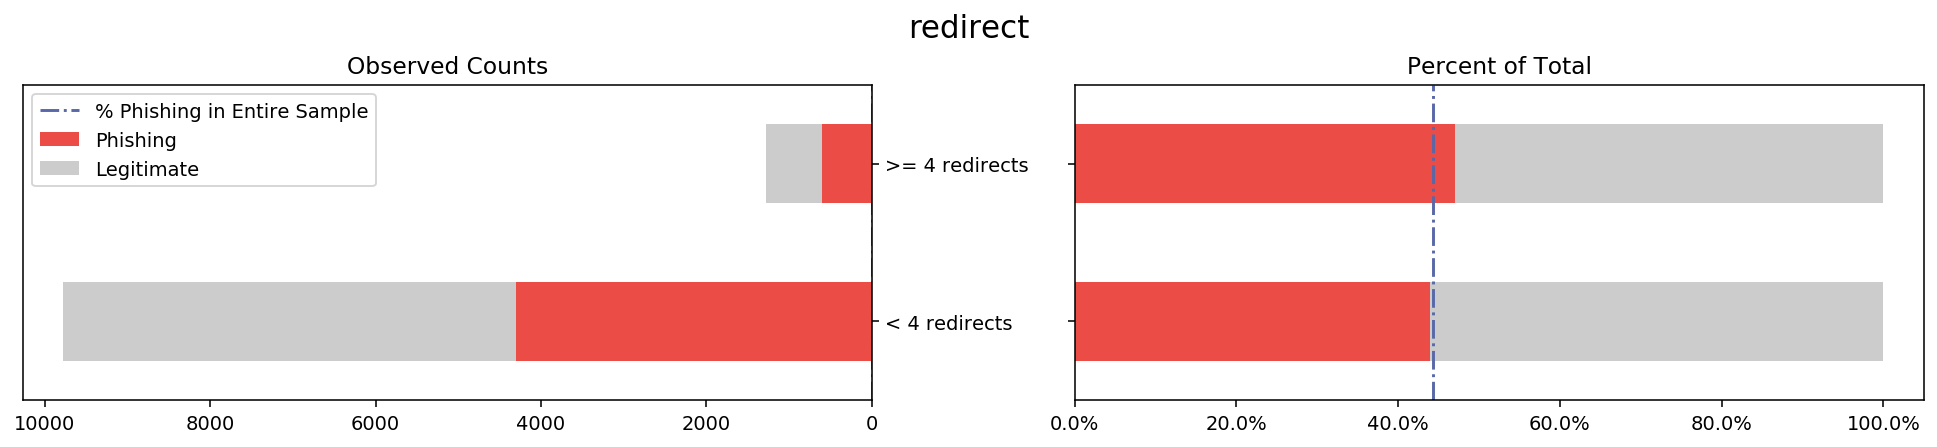

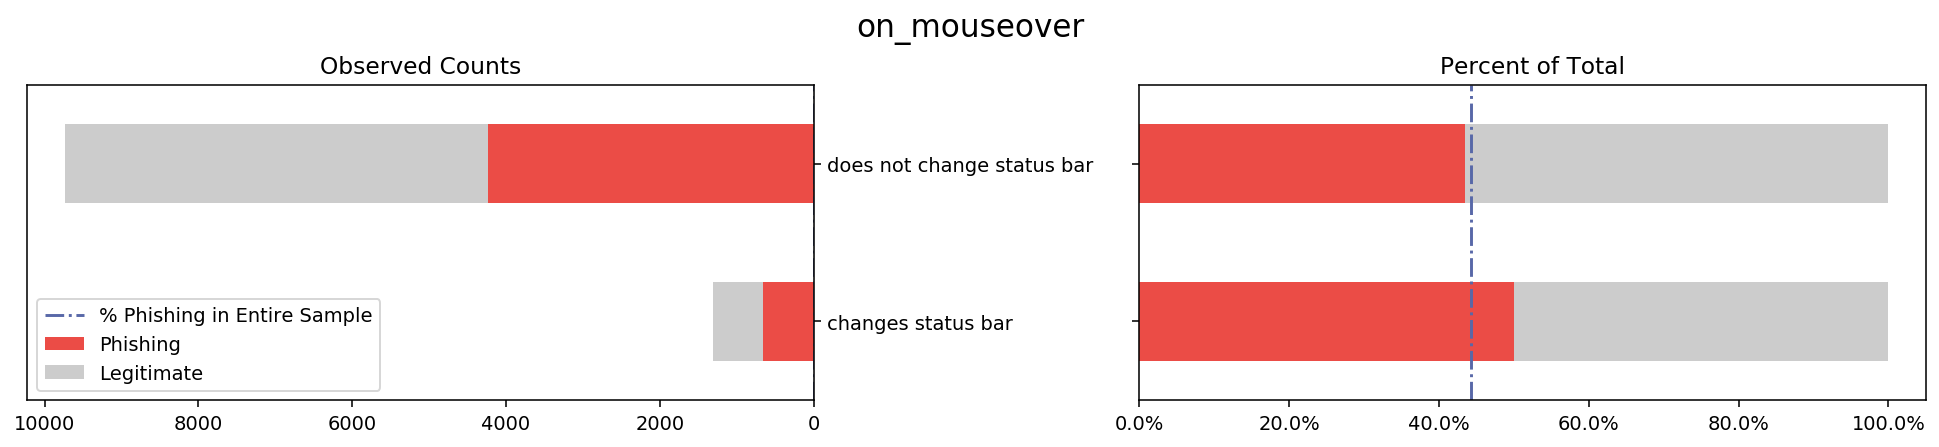

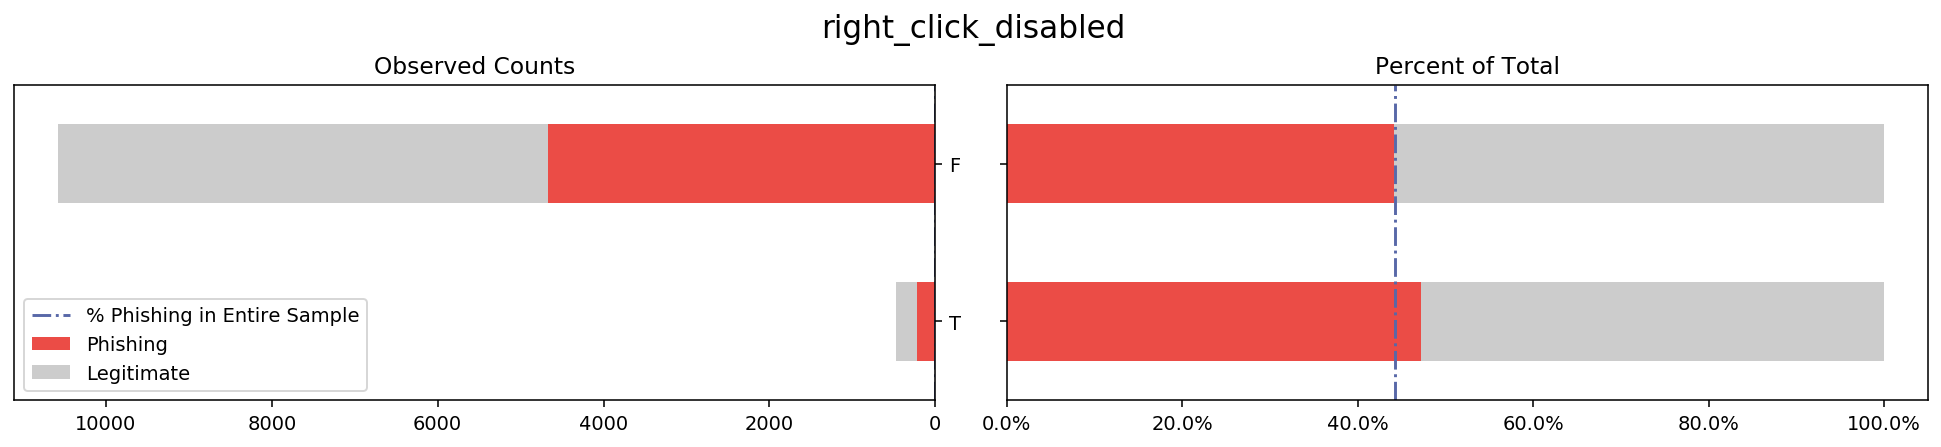

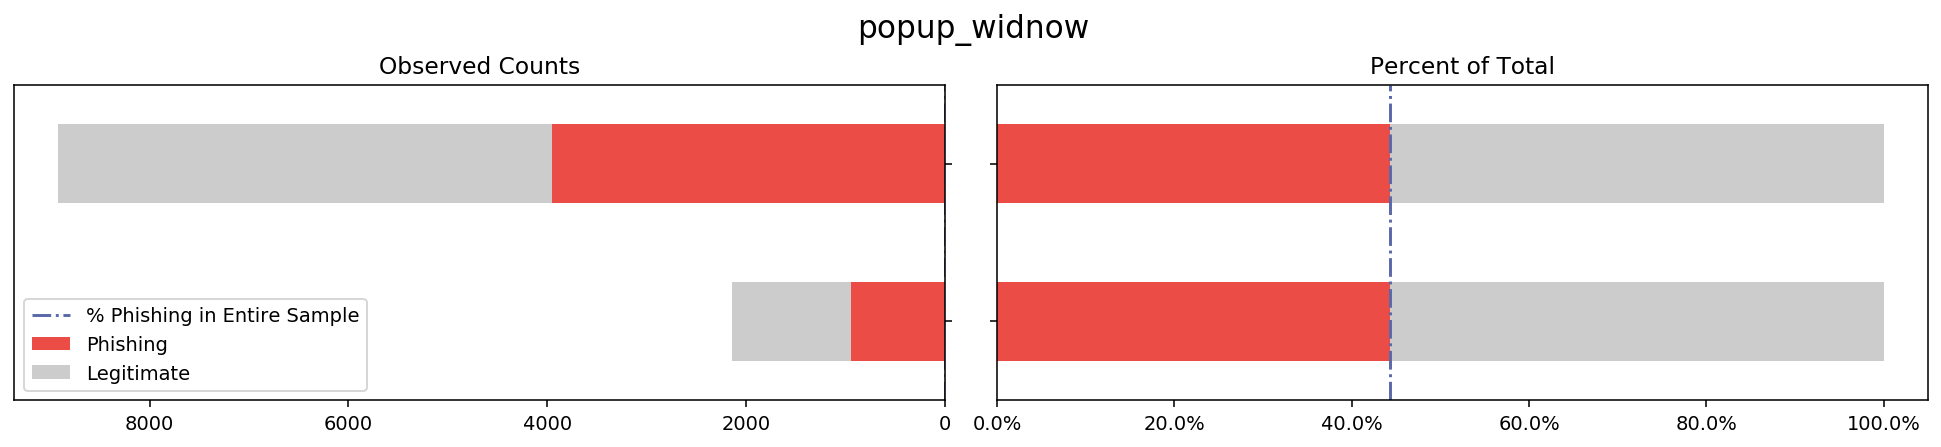

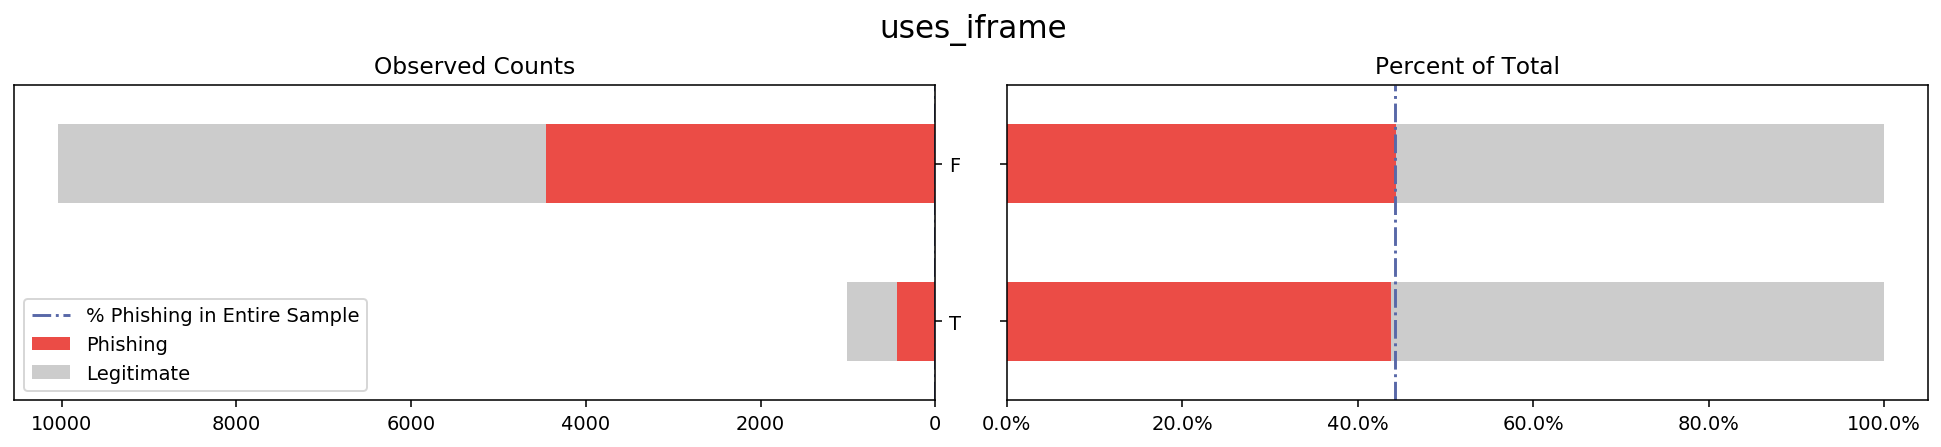

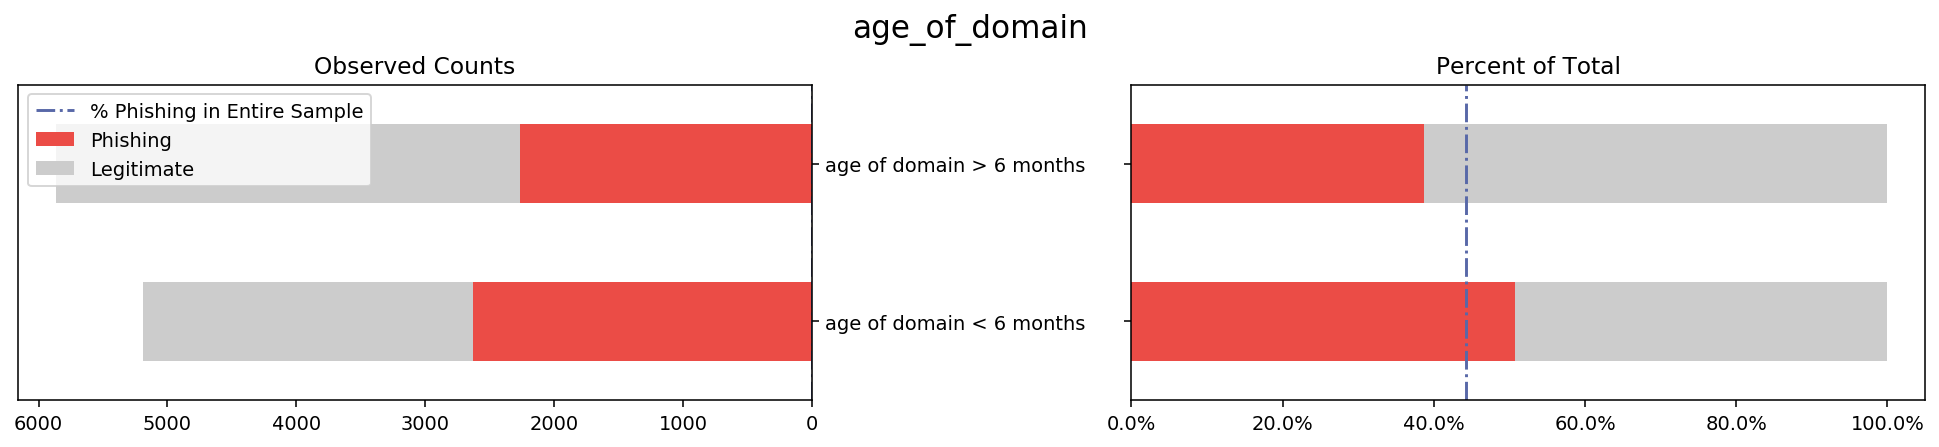

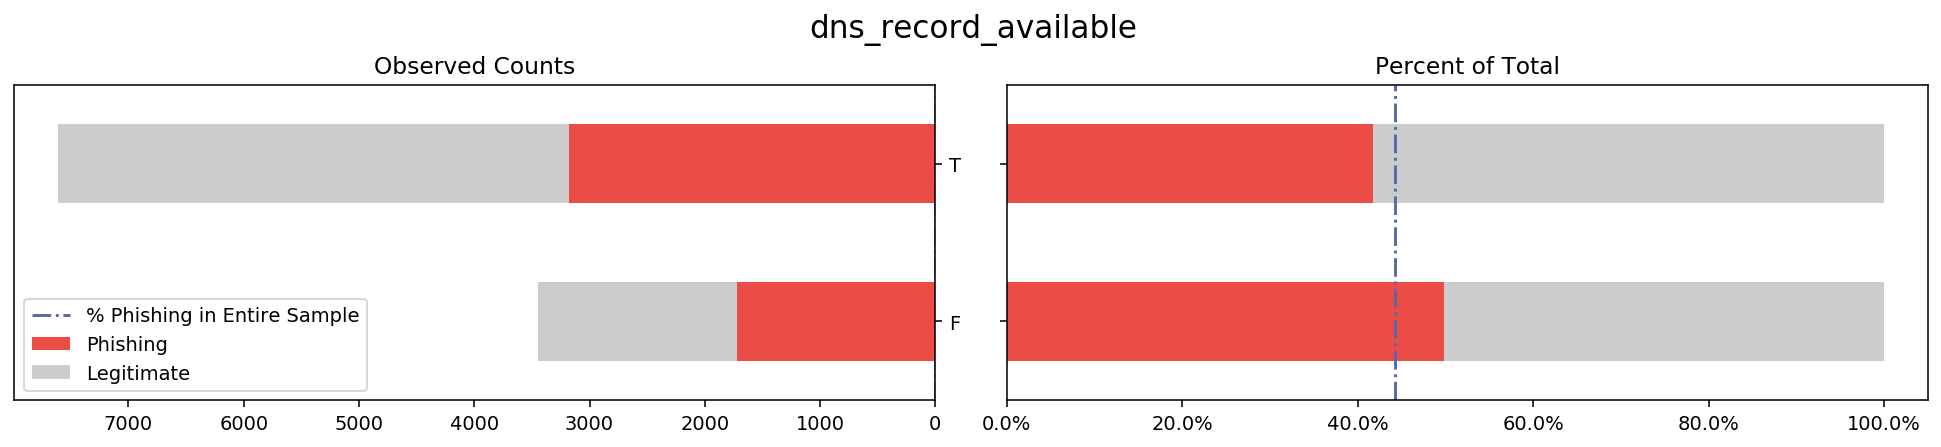

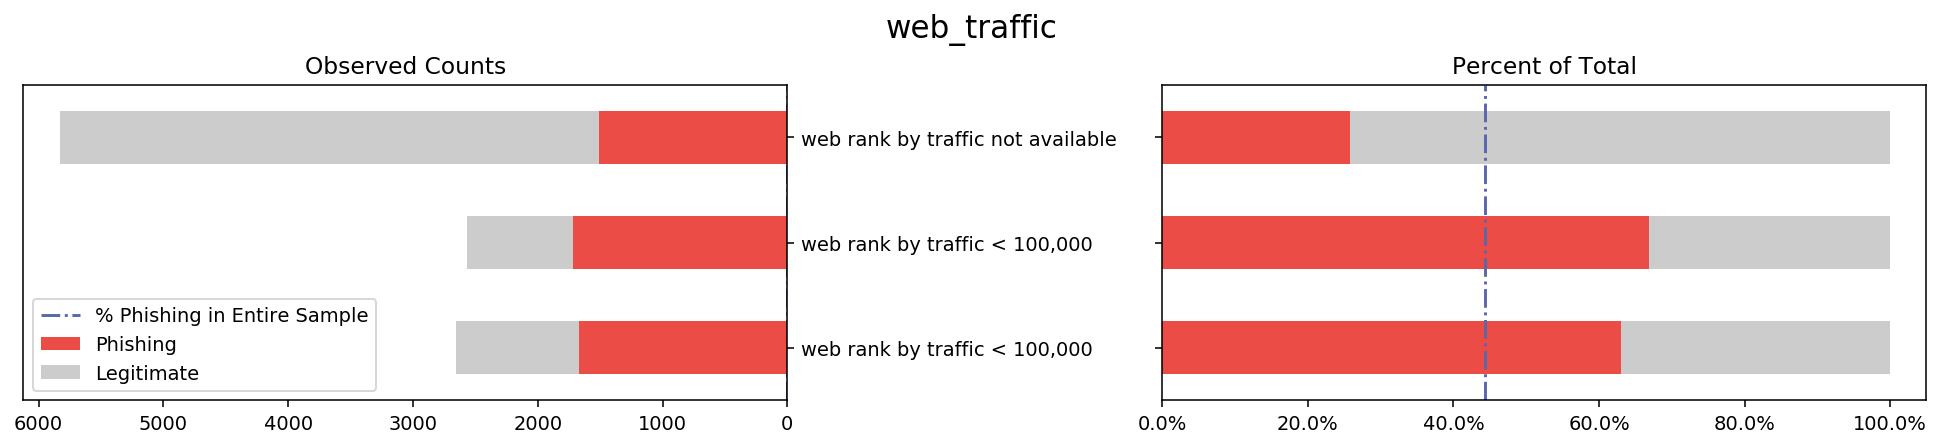

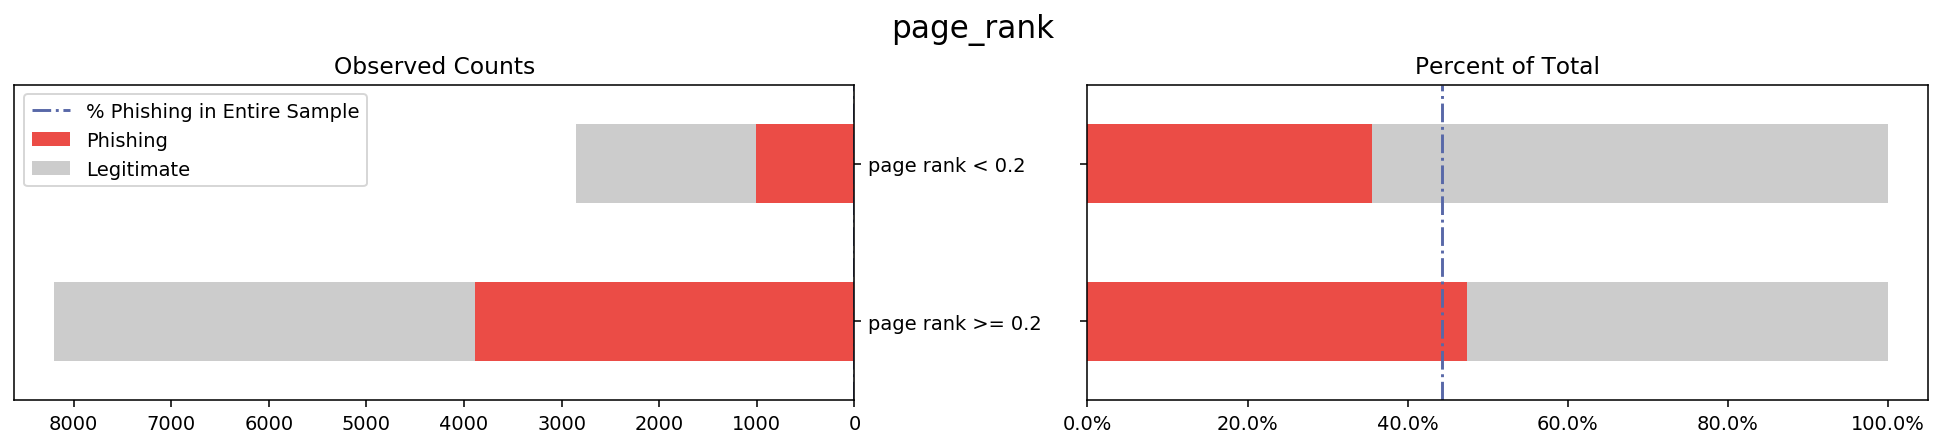

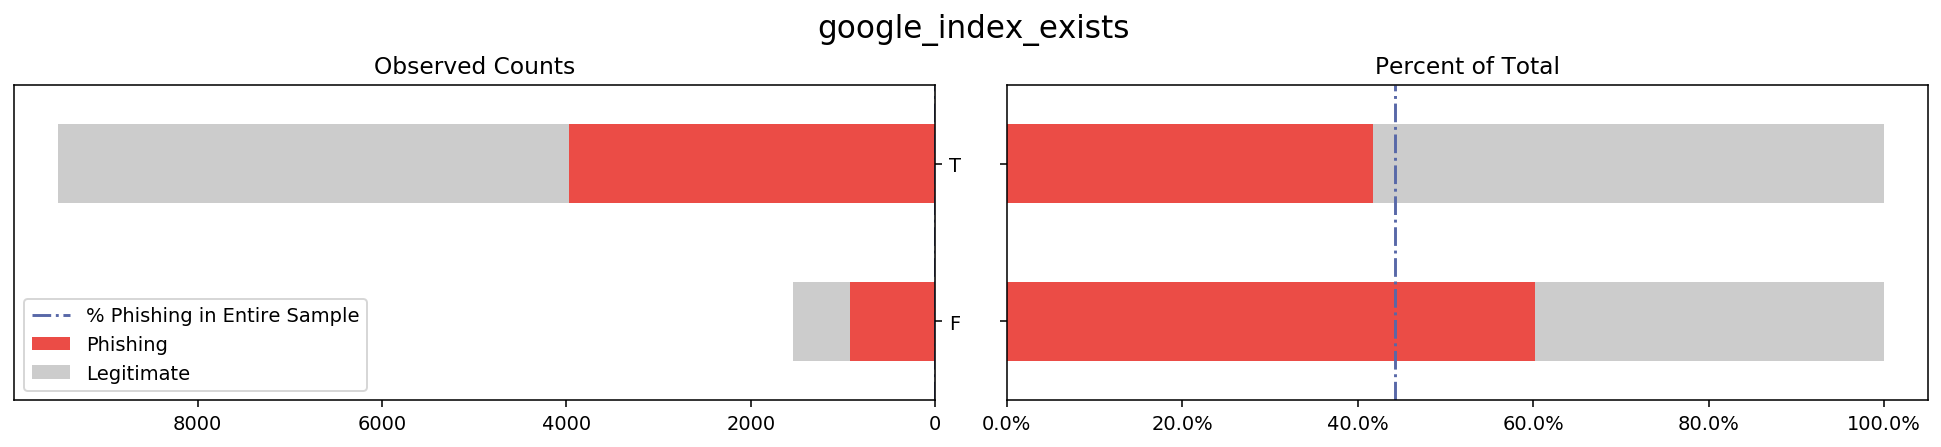

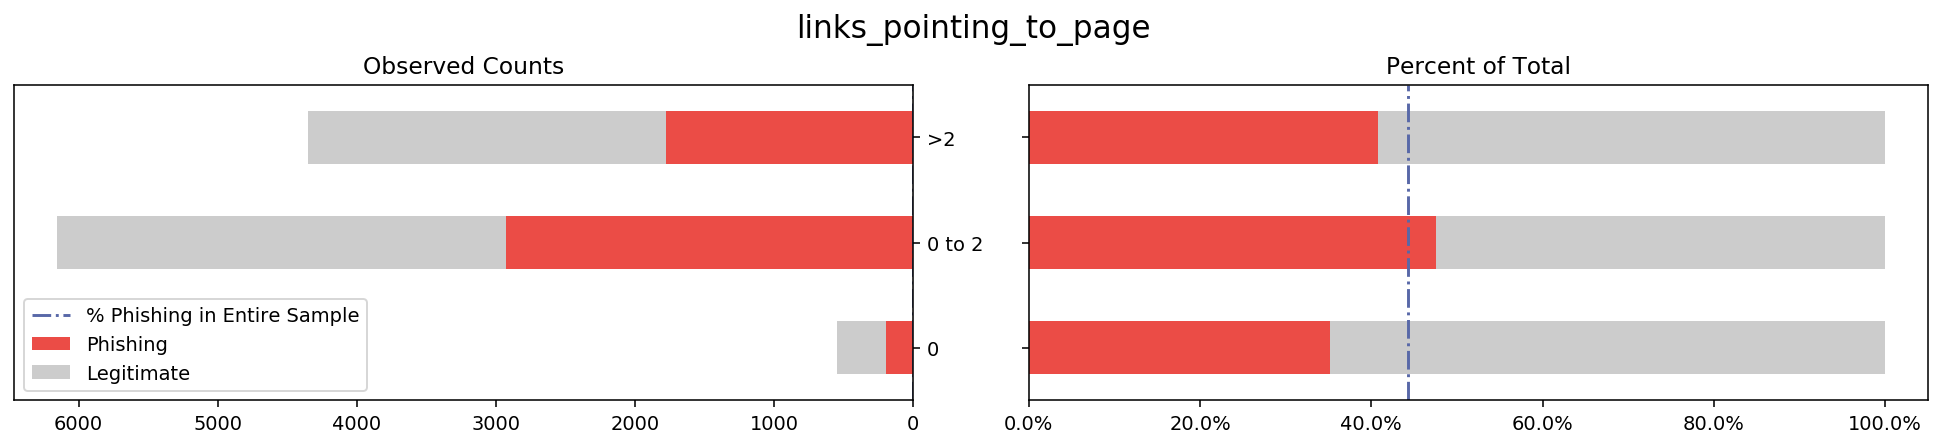

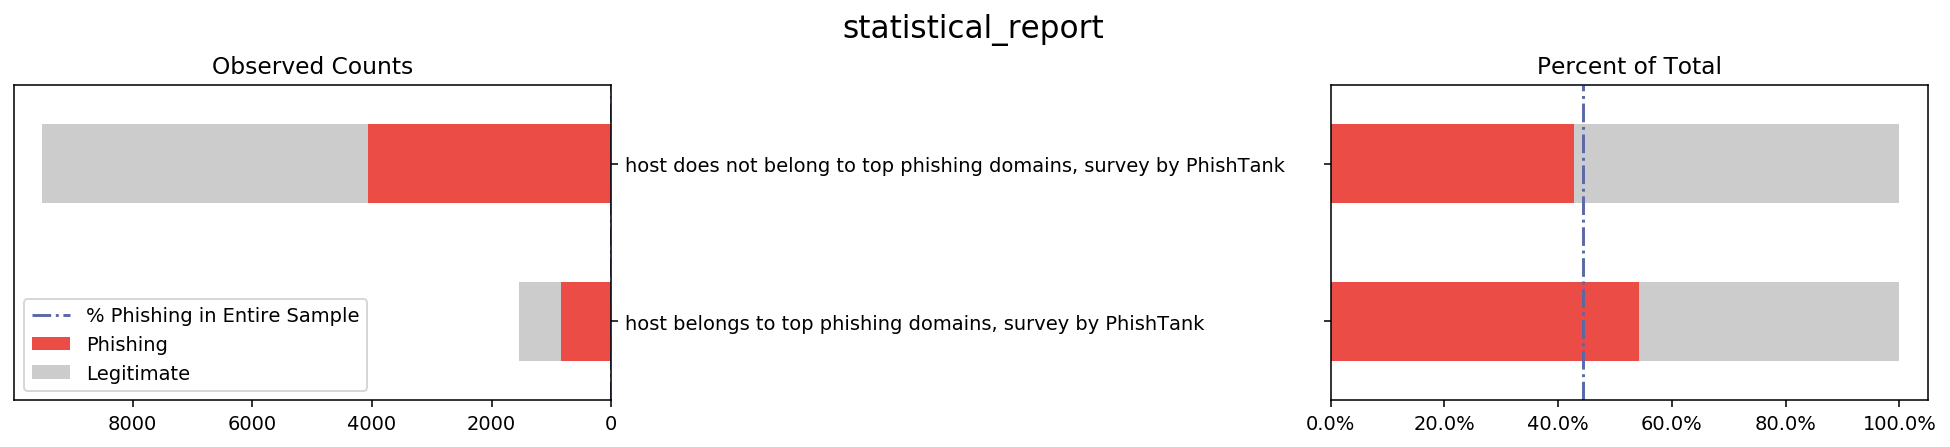

In [222]:
for column in data.columns:
    if column == 'result':
        pass
    else:
        # Figure specs
        fig = plt.figure(figsize=(14, 3), dpi=140)
        fig.suptitle(column, fontsize=16, y=1.05)

        # Divide the figure into a 1x2 grid, and give me the first section

        ax1 = fig.add_subplot(121)

        # Divide the figure into a 1x2 grid, and give me the second section
        ax2 = fig.add_subplot(122)

        # Left groupby and plot
        g_count = data.groupby([column, 'result']).size().unstack('result')
        g_count.plot.barh(stacked = True, ax = ax1, color = pal).invert_xaxis()
        ax1.yaxis.tick_right()
        ax1.set_ylabel('')
        ax1.set_yticklabels(data_dict[column].values())
        ax1.axvline(0, color='#5868a8', linewidth=1.5, linestyle = '-.', label = 'Horizontal')
        ax1.legend(labels=['% Phishing in Entire Sample', 'Phishing', 'Legitimate'])
        #ax1.set_xlabel('Count')
        ax1.set_title('Observed Counts')


        # Right groupby and plot
        g_count2 = data.groupby([column, 'result']).size().unstack(column)
        p = g_count2.divide(g_count2.sum())
        plot2 = p.transpose().plot.barh(stacked = True, ax = ax2, color = pal)
        ax2.get_legend().remove()
        ax2.axvline(prop_phish, color='#5868a8', linewidth=1.5, linestyle = '-.')
        ticks = np.round(ax2.get_xticks()*100)
        ax2.set_xticklabels(['{:}%'.format(j) for j in [str(i) for i in ticks]])
        #ax2.set_xlabel('%')
        ax2.set_ylabel('')
        ax2.set_yticklabels('')
        ax2.set_title('Percent of Total')

        fig.tight_layout()

In [ ]:
# sort to the interesting ones
# compare the interesting ones.